In [1]:
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
import gower


In [3]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, adjusted_rand_score, davies_bouldin_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

In [2]:
import pandas as pd
import numpy as np
import pickle

#data = pd.read_pickle("data\computed\matches_EWT_delay_subsampled.pkl")


In [15]:
data = data[["dist_m", "date_label", "mode", "delay" ]]

## KPrototype

In [3]:
from sklearn import preprocessing
data = pd.read_pickle("data/computed/matches_EWT_delay.pkl")[["dist_m", "date_label", "mode", "delay" ]]

In [8]:
data["dist_m"] = data["dist_m"].fillna(0)

In [9]:
scaler = preprocessing.StandardScaler()
data[['dist_m_norm','delay_norm']] = scaler.fit_transform(data[['dist_m','delay']] )
data_train = data[['dist_m_norm','delay_norm', "date_label", "mode"]]

In [10]:
catColumnsPos = [data_train.columns.get_loc(col) for col in list(data_train.select_dtypes('object').columns)]
print('Categorical columns           : {}'.format(list(data_train.select_dtypes('object').columns)))
print('Categorical columns position  : {}'.format(catColumnsPos))

Categorical columns           : ['date_label', 'mode']
Categorical columns position  : [2, 3]


In [11]:
df = data_train.to_numpy()

In [13]:
from kmodes.kprototypes import KPrototypes

kprototype = KPrototypes(n_jobs = 10, n_clusters = 3, init = 'Huang', random_state = 0)
kprototype.fit_predict(df, categorical = catColumnsPos)

KeyboardInterrupt: 

In [29]:
centroids = kprototype.cluster_centroids_
centroids

array([['0.735533759717437', '-0.37003964430921216', 'workdays', 'M'],
       ['-1.1175077528921864', '-0.22758201938851058', 'workdays', 'M'],
       ['0.09042348802723507', '1.7531604816364448', 'workdays', 'M']],
      dtype='<U32')

In [30]:
labels = kprototype.labels_

In [31]:
data['cluster_method'] = labels

In [32]:
data

,dist_m,date_label,mode,delay,dist_m_norm,delay_norm,cluster_method
3755153,588.817544,workdays,M,253,1.072820,1.426659,2
3755159,588.817544,workdays,M,-71,1.072820,-1.289230,0
3755163,588.817544,workdays,M,275,1.072820,1.611071,2
3755164,588.817544,workdays,M,-85,1.072820,-1.406583,0
3755336,588.817544,workdays,M,-76,1.072820,-1.331142,0
...,...,...,...,...,...,...,...
3773839,471.506564,saturday,M,229,0.037328,1.225482,2
3773840,471.506564,saturday,M,2,0.037328,-0.677317,0
3773841,471.506564,saturday,M,128,0.037328,0.378863,0
3773842,471.506564,sunday,M,-2,0.037328,-0.710846,0


In [33]:
import plotly.express as px
df = px.data.iris()
fig = px.scatter(data, x="dist_m", y="delay", symbol="date_label", color='cluster_method')
fig.show()

## KMedoids

In [3]:
import gower
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import silhouette_score, adjusted_rand_score, davies_bouldin_score
from sklearn_extra.cluster import KMedoids
import matplotlib.pyplot as plt

In [146]:
data

,dist_m,date_label,mode,delay
3755153,588.817544,workdays,M,253
3755159,588.817544,workdays,M,-71
3755163,588.817544,workdays,M,275
3755164,588.817544,workdays,M,-85
3755336,588.817544,workdays,M,-76
...,...,...,...,...
3773839,471.506564,saturday,M,229
3773840,471.506564,saturday,M,2
3773841,471.506564,saturday,M,128
3773842,471.506564,sunday,M,-2


In [5]:
data[['date_label', 'mode']] = data[[ 'date_label', 'mode']].apply(LabelEncoder().fit_transform)
scaler = StandardScaler()
data[["dist_m", "delay"]] = scaler.fit_transform(data[["dist_m", "delay"]])
gower_mat = gower.gower_matrix(data)


In [6]:
km_model = KMedoids(n_clusters = 3, random_state = 0, metric = 'precomputed', method = 'pam', init =  'k-medoids++').fit(gower_mat)  
clusters = km_model.labels_
centroids = km_model.cluster_centers_

In [8]:
davies_bouldin_score(data, clusters)

1.0436838008026728

In [7]:
print(centroids)

None


In [8]:
names = ["dist_m", "date_label", "mode", "delay" ]
values1 = centroids[0]
values2 = centroids[1]
values3 = centroids[2]
plt.plot(names, values1, label= "cluster 1")
plt.plot(names, values2, label= "cluster 2")
plt.plot(names, values3, label= "cluster 3")
plt.legend()
plt.show()

TypeError: 'NoneType' object is not subscriptable

In [4]:
date= [data.date_label == "workdays", data.date_label =="saturday",  data.date_label =="sunday"]
transport_type = [ data["mode"] == "B", data["mode"] == "T", data["mode"] == "M"]
choices = [1, 2, 3]

data.date_label = np.select(date, choices)
data["mode"] = np.select(transport_type, choices)



,delay,mode,dist_m,date_label
3755153,253,3,588.817544,1
3755159,-71,3,588.817544,1
3755163,275,3,588.817544,1
3755164,-85,3,588.817544,1
3755336,-76,3,588.817544,1
...,...,...,...,...
3773839,229,3,471.506564,2
3773840,2,3,471.506564,2
3773841,128,3,471.506564,2
3773842,-2,3,471.506564,3


In [7]:
dt = data.to_numpy()

## K-Means()

In [52]:
kmeans = KMeans(
     init="k-means++",
     n_clusters=3,
     n_init=10,
     max_iter=300,
     random_state=42
)

### MinMax

In [48]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(dt)

In [53]:
kmeans.fit(scaled_data)

KMeans(n_clusters=3, random_state=42)

In [54]:
labels = kmeans.labels_

In [50]:
centroids = kmeans.cluster_centers_

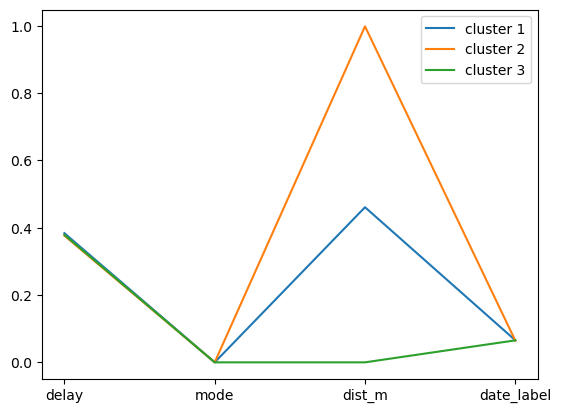

In [51]:
names = ['delay', 'mode', 'dist_m', 'date_label',]
values1 = centroids[0]
values2 = centroids[1]
values3 = centroids[2]
plt.plot(names, values1, label= "cluster 1")
plt.plot(names, values2, label= "cluster 2")
plt.plot(names, values3, label= "cluster 3")
plt.legend()
plt.show()

In [12]:
data["cluster"] = kmeans.labels_

In [13]:
data

,delay,mode,dist_m,date_label,cluster
3755153,253,3,588.817544,1,1
3755159,-71,3,588.817544,1,1
3755163,275,3,588.817544,1,1
3755164,-85,3,588.817544,1,1
3755336,-76,3,588.817544,1,1
...,...,...,...,...,...
3773839,229,3,471.506564,2,0
3773840,2,3,471.506564,2,0
3773841,128,3,471.506564,2,0
3773842,-2,3,471.506564,3,0


In [16]:
data.cluster.value_counts()

1    3723
0    3708
2    1869
Name: cluster, dtype: int64

In [55]:
davies_bouldin_score(scaled_data, labels)

0.7218461089430419

In [21]:
centroids = kmeans.cluster_centers_
centroids

array([[3.83713894e-01, 0.00000000e+00, 4.60763973e-01, 6.55339806e-02],
       [3.76310959e-01, 0.00000000e+00, 9.98116125e-01, 6.45984421e-02],
       [3.78783216e-01, 0.00000000e+00, 4.88498131e-15, 6.52755484e-02]])

### Z-transformation

In [118]:
data = data[["delay","mode", "dist_m", "date_label"]]
date= [data.date_label == "workdays", data.date_label =="saturday",  data.date_label =="sunday"]
transport_type = [ data["mode"] == "B", data["mode"] == "T", data["mode"] == "M"]
choices = [1, 2, 3]

data.date_label = np.select(date, choices)
data["mode"] = np.select(transport_type, choices)

In [119]:
dt = data.to_numpy()

In [128]:
scaler = StandardScaler()
z_data = scaler.fit_transform(dt)

In [95]:
z_data

array([[0.50106914, 1.        ],
       [0.27013542, 1.        ],
       [0.51674982, 1.        ],
       ...,
       [0.41197434, 0.59777885],
       [0.31931575, 0.59777885],
       [0.3442623 , 0.59777885]])

In [129]:
kmeans.fit(z_data)

KMeans(n_clusters=3, random_state=42)

In [130]:
labels = kmeans.labels_

In [133]:
data["cluster"] = labels

In [140]:
data[data["cluster"]== 0]

,delay,mode,dist_m,date_label,cluster
3755153,253,3,588.817544,1,0
3755159,-71,3,588.817544,1,0
3755163,275,3,588.817544,1,0
3755164,-85,3,588.817544,1,0
3755336,-76,3,588.817544,1,0
...,...,...,...,...,...
3773713,46,3,471.506564,1,0
3773714,11,3,471.506564,1,0
3773715,139,3,471.506564,1,0
3773716,43,3,471.506564,1,0


In [123]:
davies_bouldin_score(scaled_data, labels)

0.4501185788521093

In [131]:
centroids = kmeans.cluster_centers_
centroids

array([[-0.1604594 ,  0.        ,  0.75633758, -0.38401743],
       [ 0.20690196,  0.        , -0.00492537,  2.5846959 ],
       [ 0.14398602,  0.        , -1.01703638, -0.38401743]])

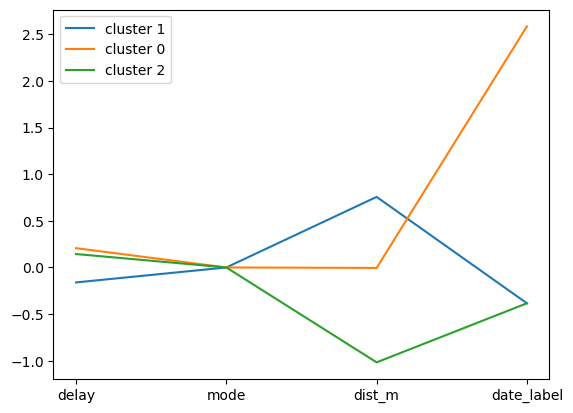

In [141]:
names = ["delay","mode", "dist_m", "date_label"]
values1 = centroids[0]
values2 = centroids[1]
values3 = centroids[2]
plt.plot(names, values1, label= "cluster 1")
plt.plot(names, values2, label= "cluster 0")
plt.plot(names, values3, label= "cluster 2")
plt.legend()
plt.show()

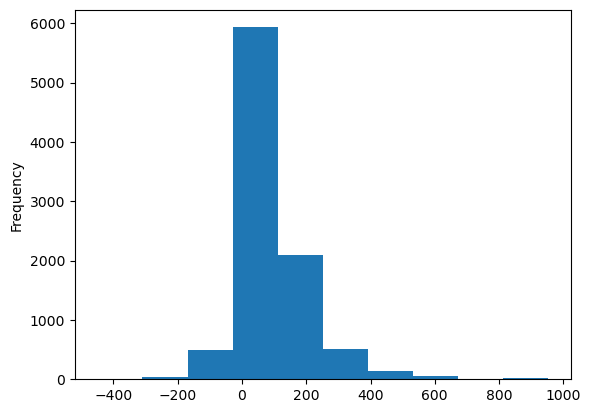

In [126]:
data.delay.plot.hist()

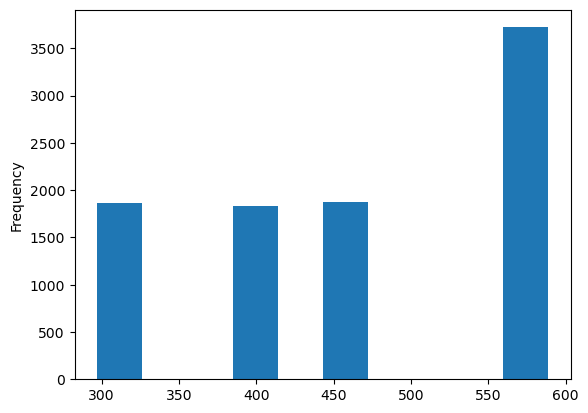

In [127]:
data.dist_m.plot.hist()